## 영화 리뷰 분석
 - IMDB 데이터 활용

In [5]:
from keras.datasets.imdb import load_data
import numpy as np

## [1] 데이터 준비

In [6]:
# 단어사전(voca)에서 빈도가 높은 500개까지만 사용하도록 설정
(x_train, y_train), (x_test, y_test)=load_data(num_words=500)

In [7]:
type(x_train)

numpy.ndarray

In [8]:
print(f'imDB정보\nx_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

imDB정보
x_train: (25000,), y_train: (25000,)
x_test: (25000,), y_test: (25000,)


In [9]:
for idx in range(3):
    print(f'{idx} - {y_train[idx]}\n{x_train[idx]}')


0 - 1
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1 - 0
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8

## [2] 학습용 데이터 변환
---
 - keras에서 이미 대부분의 전처리 끝난 데이터
 - 길이 조정 -> 패딩(Padding)

In [10]:
# [2-1] 데이터별 길이 결정
len_list=[]
for x in x_train:
    len_list.append(len(x))

In [11]:
max(len_list), min(len_list), sum(len_list)/25000

(2494, 11, 238.71364)

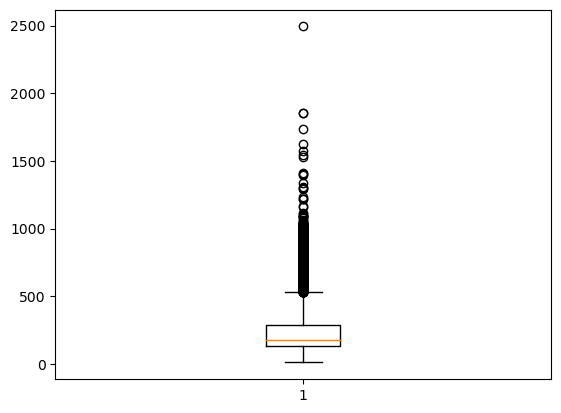

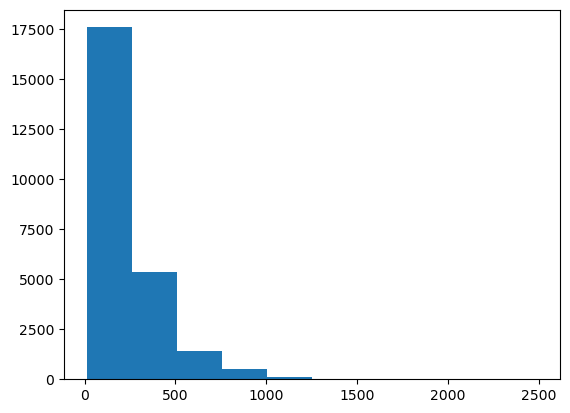

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(len_list)
plt.show()

plt.hist(len_list)
plt.show()

In [13]:
# [2-2] 데이터별 길이 변경

In [14]:
x_train.shape

(25000,)

In [15]:
from keras.utils import pad_sequences
encding_x_train=pad_sequences(x_train, maxlen=200)
encding_x_train

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]])

In [16]:
encding_x_test=pad_sequences(x_test, maxlen=200)
encding_x_test

array([[  0,   0,   0, ...,  14,   6,   2],
       [  2,   2,  45, ..., 125,   4,   2],
       [  2, 189,   4, ...,   9,  57,   2],
       ...,
       [  0,   0,   0, ...,  21,   2,   2],
       [  0,   0,   0, ...,   2,   7, 470],
       [  0,   0,   0, ...,  34,   2,   2]])

In [17]:
encding_x_test.shape

(25000, 200)

In [22]:
# 메모리 에러
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [23]:
from keras.utils import to_categorical
train_oh=to_categorical(encding_x_train)


MemoryError: Unable to allocate 9.31 GiB for an array with shape (5000000, 500) and data type float32

In [16]:
train_oh.shape

(25000, 200, 500)

In [ ]:
# [2-3] 훈련/테스트 데이터 준비

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_oh, y_train, test_size=0.2, random_state=42)

In [18]:
print(f'x_train: {x_train.shape}, x_val: {x_val.shape}, encding_x_test: {encding_x_test.shape}')

x_train: (20000, 200, 500), x_val: (5000, 200, 500), encding_x_test: (25000, 200)


## [3] 모델
---
 - 목표: 영화 리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
 - 학습모델: RNN 순환신경망
 - 입력: 500
 - 출력: 1 

In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

### [3-1] 모델구성
---
 - 입력층: 노드 n개, 타임스탬프수, 피쳐수 -> simpleRNN
 - 출력층: 노드 1개 sigmoid            -> Dense 

In [84]:
model=Sequential()

                                                # return_sequences=True 그대로 돌려줌(RNN층 여러개 사용할 때)
model.add(SimpleRNN(32, input_shape=(200, 500), return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 200, 32)           17056     
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,857
Trainable params: 17,857
Non-trainable params: 0
_________________________________________________________________


### [3-2] 모델생성
---
 - 손실함수, 최적화방법, 평가항목 -> compile()

In [85]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## [4] 학습
---
 - train 데이터와 타겟으로 학습 진행
 - epoch마다 검증 진행 -> validation_data or validation_split
 - 학습 중 이벤트 처리 -> callbacks=[]
 - 학습 진행 내용 조정 -> verbose
 - 학습 횟주 조정 -> epochs
 - 배치사이즈 조절-> batch_size (기본값:32)

In [86]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
157/157 [==============================] - 21s 123ms/step - loss: 0.6678 - accuracy: 0.5893 - val_loss: 0.5848 - val_accuracy: 0.7124
Epoch 2/10
157/157 [==============================] - 19s 122ms/step - loss: 0.5111 - accuracy: 0.7557 - val_loss: 0.4678 - val_accuracy: 0.7872
Epoch 3/10
157/157 [==============================] - 20s 126ms/step - loss: 0.4474 - accuracy: 0.8000 - val_loss: 0.4356 - val_accuracy: 0.8046
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.4125 - accuracy: 0.8193 - val_loss: 0.4249 - val_accuracy: 0.8126
Epoch 5/10
157/157 [==============================] - 23s 147ms/step - loss: 0.4162 - accuracy: 0.8158 - val_loss: 0.4519 - val_accuracy: 0.7890
Epoch 6/10
157/157 [==============================] - 23s 147ms/step - loss: 0.3848 - accuracy: 0.8361 - val_loss: 0.4367 - val_accuracy: 0.8104
Epoch 7/10
157/157 [==============================] - 23s 147ms/step - loss: 0.3636 - accuracy: 0.8454 - val_loss: 0.4594 - val_ac

40.0

## Embedding RNN Model
---
 - One-Hot-Encoding 입력 데이터의 많은 메모리 소모에 대한 문제 해결
 - 토큰을 밀집형태의 벡터로 변경 -> Word Embedding
 - Embedding Layer 적용
   - 입력 차원 - 토큰의 크기 즉 단어사전의 크기
   - 출력 차원 - 줄여서 생성하는 벡터 크기
   - 입력층일 경우 -> input_dim = 타임스탬프 즉 하나의 문장을 구성하는 토큰 수

In [65]:
from keras.layers import Embedding

In [121]:
model2=Sequential()

# One-Hot-Encoding의 거대한 데이터 -> 밀집형태의 벡터로 변환
# 500개를 받아서 20개로 줄임, input_length=토큰갯수
model2.add(Embedding(500, 20, input_length=200))
model2.add(SimpleRNN(10))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 200, 20)           10000     
                                                                 
 simple_rnn_40 (SimpleRNN)   (None, 10)                310       
                                                                 
 dense_48 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


In [122]:
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [123]:
model2.fit(x_train, y_train)

ValueError: in user code:

    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_39" (type Sequential).
    
    Input 0 of layer "simple_rnn_40" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (32, 200, 500, 20)
    
    Call arguments received by layer "sequential_39" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 200, 500), dtype=float32)
      • training=True
      • mask=None


(20000, 200, 500)